In [3]:
# SIMPLE LINEAR REGRESSION 
#Delivery_time -> Predict delivery time using sorting time


In [9]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [10]:
data=pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [15]:
# EDA & DATA VISUALISATION


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [18]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [36]:
data1=data.iloc[:,0:1:]
data1

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [37]:
data1=data.iloc[:,1:]
data1

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [38]:
data1=data.iloc[1]
data1

Delivery Time    13.5
Sorting Time      4.0
Name: 1, dtype: float64

In [42]:
data=data1.copy()
data

Delivery Time    13.5
Sorting Time      4.0
Name: 1, dtype: float64

In [44]:
data['Delivery Time']=pd.to_numeric(data['Delivery Time'])
data['Delivery Time']

13.5

In [48]:
data[data.duplicated()]

Series([], Name: 1, dtype: float64)

In [49]:
data_cleaned=data.drop_duplicates()

In [51]:
data_cleaned

Delivery Time    13.5
Sorting Time      4.0
Name: 1, dtype: float64

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

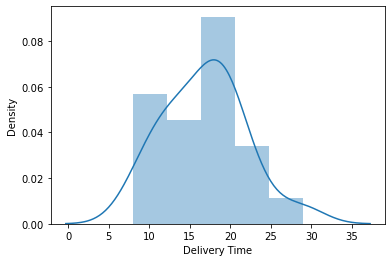

In [9]:
sns.distplot(data['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

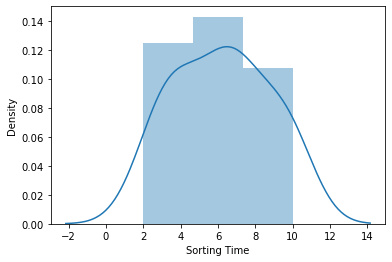

In [10]:
sns.distplot(data['Sorting Time'])

In [11]:
# FEATURE ENGINEERING

In [12]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [13]:
#CORRELATION

In [14]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [15]:
data.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

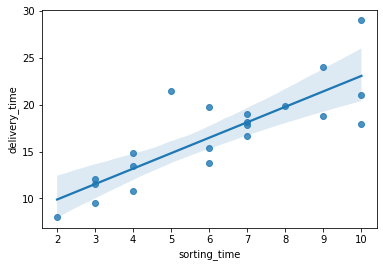

In [16]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

In [17]:
# MODEL BUILDING

In [27]:
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=data).fit()

In [28]:
#MODEL TESTING

In [29]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           3.98e-06
Time:                        15:13:44   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [33]:
#MODEL PREDICTION

In [34]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [35]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [36]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [37]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [38]:
#SALARY_HIKE -> BUILD A PREDICTION MODEL FOR SALARY_HIKE

In [40]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')


In [41]:
dataset=pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [42]:
# EDA & DATA VISUALISATION

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

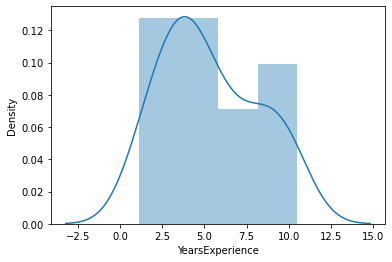

In [45]:
sns.distplot(dataset['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

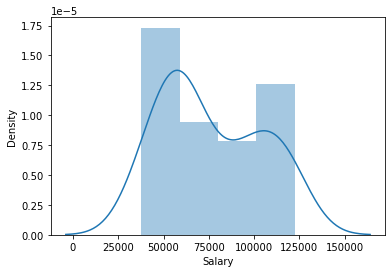

In [50]:
sns.distplot(dataset['Salary'])

In [51]:
#CORRELATION

In [52]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [53]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

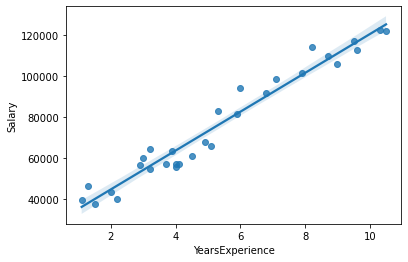

In [54]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

In [55]:
#MODEL BUILDING

In [56]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=dataset).fit()

In [57]:
#MODEL TESTING

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           1.14e-20
Time:                        15:26:53   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# FINDING COEFFICIENT PARAMETER
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [60]:
# FINDING PVALUES & TVALUES
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [62]:
#MODEL PREDICTION

In [63]:
# MANUAL PREDICTION FOR 3 YEARS EXPERIENCE
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [64]:
# AUTOMATIC PREDICTION FOR SAY 3 & 5 YEARS EXPERIENCE
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [65]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred


,YearsExperience
0,3
1,5


In [67]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64